<h1 style="color:rgb(0,120,170)">Assignment 6: Factor Analysis</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1 (20 Points): Prove the following Lemma</h2>

Show that for any matrix $X$ and any differentiable scalar-valued function $f$ it holds that 
$$
\frac{\partial f(X^\top X)}{\partial X} = 2{X}\frac{\partial f(X^\top X)}{\partial (X^\top X)}.
$$

########## YOUR SOLUTION HERE ##########

The function $f$ is applied to the matrix product $X^\top X$. To find the derivative of $f$ with respect to $X$, we need to apply the chain rule in matrix calculus.

$$
\frac{\partial g(Y)}{\partial X} = \frac{\partial g(Y)}{\partial Y} \frac{\partial Y}{\partial X}.
$$

Now we calculate $\frac{\partial (X^\top X)}{\partial X}$.
$$
\frac{\partial (X^\top X)}{\partial X} = X \frac{\partial X^\top}{\partial X} + \frac{\partial X}{\partial X} X^\top.
$$

Since $\frac{\partial X^\top}{\partial X} = 0$ (as $X^\top$ does not directly depend on $X$ but its transpose), and $\frac{\partial X}{\partial X}$ is essentially an identity matrix in matrix calculus:
$$
\frac{\partial (X^\top X)}{\partial X} = 2X.
$$

Using the results back into our chain rule expression, we get:
$$
\frac{\partial f(X^\top X)}{\partial X} = \frac{\partial f(X^\top X)}{\partial (X^\top X)} \cdot 2X.
$$

Therefore, we have shown that
$$
\frac{\partial f(X^\top X)}{\partial X} = 2X \frac{\partial f(X^\top X)}{\partial (X^\top X)},
$$

<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and show that its gradients with respect to the model parameters are 
$$
\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi}) = 2 \mathbf{P}\mathbf{U}
$$
and
$$
\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \operatorname{diag}(\mathbf{P})
$$
, where 
$$
\mathbf{P} = \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \frac12 \mathbf{Q} - \frac{1}{2n} \mathbf{Q} \mathbf{X}^\top \mathbf{X} \mathbf{Q}
$$
and
$$
\mathbf{Q} = (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1}.
$$ 

Hint: use the fact that if $f(\mathbf{A})=f(\mathbf{A}^T)$ holds for a scalar function $f$ and a real square matrix $\mathbf{A}$ it holds that $\nabla_{\mathbf{X}} f(\mathbf{X}^\top \mathbf{X}) = 2 \mathbf{X} \nabla_{\mathbf{X}^\top \mathbf{X}} f(\mathbf{X}^\top \mathbf{X})$. 

########## YOUR SOLUTION HERE ##########

The negative log-likelihood (divided by $n$) is 

$$
\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})
= \frac{m}{2} \log(2 \pi) + \frac12 \log \det(\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}) + \frac{1}{2n} \sum_{i=1}^n\mathbf{x}_i^\top (\mathbf{U} \mathbf{U}^\top + \mathbf{\Psi})^{-1} \mathbf{x}_i.
$$

First, we note that its gradient with respect to $(\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})$ is 

$$
\nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \frac12 (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1} - \frac{1}{2} (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1} \left(\frac 1 n \sum_{i=1}^n \mathbf{x}_i\mathbf{x}_i^\top\right) (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1} \\
= \frac12 (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1} - \frac{1}{2n} (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1} \mathbf{X}^\top \mathbf{X} (\mathbf{U} \mathbf{U}^\top + \mathbf{\Psi})^{-1}
$$

by using $(X^{-1})^T = (X^T)^{-1}$ and $\frac{d (\mathbf{a^T A^{-1} b})}{\mathbf{A}} = \mathbf{A}^{-T} \mathbf{a b}^T \mathbf{A}^{-T}$

$$
\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi}) = 2 \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) \mathbf{U} = \mathbf{Q}\mathbf{U} - \frac1n \mathbf{Q}\mathbf{X}^\top \mathbf{X}\mathbf{Q}\mathbf{U}.
$$

Finally, the derivative w.r.t. $\mathbf{\Psi}$ is 

$$
\nabla_{\mathbf{\Psi}}\ell(\mathbf{U}, \mathbf{\Psi}) = \operatorname{diag}(\nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi})) = \operatorname{diag}(\mathbf{Q} - \frac1n \mathbf{Q}\mathbf{X}^\top \mathbf{X}\mathbf{Q}).
$$

This is not totally precise since the derivatives w.r.t. to the off-diagonal entries of $\mathbf{\Psi}$ are 
not zero. Since we are only interested in the derivatives w.r.t. to the diagonal entries no harm is done discarding them. Note that the $\operatorname{diag}$ operator sets all off-diagonal entries to zero. 


<h2 style="color:rgb(0,120,170)">Task 3 (20 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

########## YOUR SOLUTION HERE ##########

np.random.seed(512) 
n, m, l = 100, 5, 3
U_ = np.random.randint(-3, 4, (m, l))
psi_ = np.random.randint(1, 4, (m))

Y = np.random.normal(size=(n, l))
E = np.random.multivariate_normal(np.zeros(m), np.diag(psi_), n)
X = Y @ U_.T + E

sigma = U_ @ U_.T + np.diag(psi_)
stds = np.expand_dims(np.sqrt(np.diag(sigma)), 1)
sigma / (stds @ stds.T)

array([[ 1.        ,  0.6634888 ,  0.        ,  0.66666667,  0.625     ],
       [ 0.6634888 ,  1.        , -0.25537696,  0.54062051,  0.51604685],
       [ 0.        , -0.25537696,  1.        , -0.09622504,  0.        ],
       [ 0.66666667,  0.54062051, -0.09622504,  1.        ,  0.83333333],
       [ 0.625     ,  0.51604685,  0.        ,  0.83333333,  1.        ]])

<h2 style="color:rgb(0,120,170)">Task 4 (20 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization.

Run 9

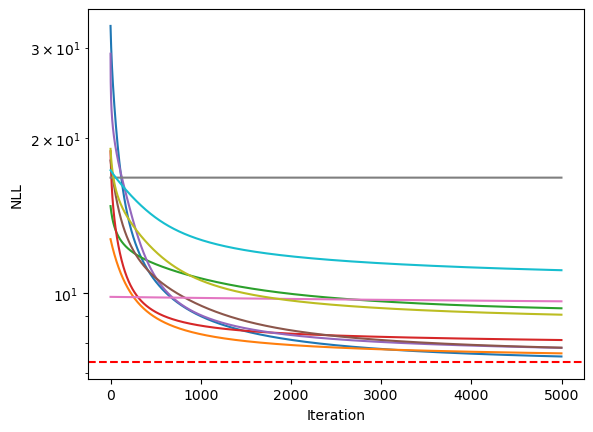

NLL for fitted parameters: 9.475136341062605  2.654308816650142
NLL for true parameters: 7.339918555821909


In [4]:
########## YOUR SOLUTION HERE ##########

def matrix_inversion_lemma(U, psi):
    psi_inv = np.diag(1/psi)
    return psi_inv - psi_inv @ U @ np.linalg.inv(np.eye(l) + U.T @ psi_inv @ U) @ U.T @ psi_inv

def nll(U, psi, X):
    sigma_inv = matrix_inversion_lemma(U, psi)
    qn = ((sigma_inv @ X.T) * X.T).sum() 
    det = np.log(1 / np.linalg.det(sigma_inv))
    return 0.5 * det + 1/(2*n) * qn

nll_true_parameters = nll(U_, psi_, X)


eta = 1e-3
nll_curve = []
np.random.seed(0)

for run in range(10):
    # initialize parameters
    U = np.random.uniform(-0.1, 0.1, (m, l))
    psi = np.random.uniform(-0.1, 0.1, (m))
    nll_curve.append([])

    for step in range(5000):
        B = matrix_inversion_lemma(U, psi)
        
        # compute gradients
        grad = 0.5 * (B - B @ X.T @ X @ B / n)
        grad_U = 2 * grad @ U 
        grad_psi = np.diag(grad)
        
        # udpate parameters
        U -= eta * grad_U
        psi -= eta * grad_psi

        # visualize learning progress
        nll_curve[run].append(nll(U, psi, X))

for curve in nll_curve:
    plt.plot(curve)

plt.axhline(nll_true_parameters, c='red', ls='--')
plt.xlabel('Iteration')
plt.ylabel('NLL')
plt.yscale('log')
plt.show()

# check final nlls against true parameters, slight overfitting
nlls_estimated = [l[-1] for l in nll_curve]
mean_nll = np.mean(nlls_estimated)
std_nll = np.std(nlls_estimated)
print(f"NLL for fitted parameters: {mean_nll}  {std_nll}")
print(f"NLL for true parameters: {nll(U_, psi_, X)}")

<h2 style="color:rgb(0,120,170)">Task 5 (20 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

Use Speedups from lecture notes!

In [3]:
########## YOUR SOLUTION HERE ##########

loss_curve = []
nll_curve = []
C = X.T @ X / n
np.random.seed(0)

for run in range(10):
    U = np.random.uniform(-0.1, 0.1, (m, l))
    psi = np.random.uniform(-0.1, 0.1, (m))
    nll_curve.append([])

    for step in range(100):
        B = matrix_inversion_lemma(U, psi)        
        M = X @ B @ U
        S = np.einsum('ij,ik->ijk', M, M) + np.eye(l) - U.T @ B @ U
        P = X.T @ M / n
        U = P @ np.linalg.inv(S.sum(0) / n)
        psi = np.diag(C - P @ U.T)
        
        nll_curve[run].append(nll(U, psi, X))

In [ ]:
for curve in nll_curve:
    plt.plot(curve)

plt.axhline(nll_true_parameters, c='red', ls='--')
plt.xlabel('Iteration')
plt.ylabel('NLL')
plt.yscale('log')
plt.show()